# A CASE STUDY OF ANEAMIA DETECTION IN CHILDREN IN NIGERIA

## 1. BUSSINESS UNDERSTANDING



# 1.1 Introduction
Anemia is a major global health issue affecting children under five, significantly hindering growth, cognitive development, and immunity. Characterized by low hemoglobin levels, anemia restricts oxygen transport in the body, which can lead to severe health complications. The World Health Organization estimates that 42% of children in this age group worldwide are anemic, primarily due to iron deficiency, poor diet, and infections.

Africa, particularly sub-Saharan regions, bears a high anemia burden, with prevalence rates reaching 60-80% among children under five. Causes include malnutrition, high rates of infections like malaria, and inadequate maternal health, worsened by socioeconomic barriers such as poverty and limited access to healthcare and nutritious food.

In Nigeria, approximately 68% of children under five are anemic, influenced by factors like limited nutrition, recurrent infections, and healthcare access challenges, particularly in rural and low-income areas. Addressing childhood anemia in Nigeria is essential due to its long-term effects on health and national development.

This project will engage families, healthcare providers, local governments, NGOs, and educational institutions to create sustainable solutions for reducing anemia among Nigerian children (UNICEF, 2021).



# 1.2 PROBLEM STATEMENT

Anemia is a widespread health challenge across Africa, particularly affecting young children and impeding their development, immunity, and long-term health outcomes. Sub-Saharan Africa has some of the world’s highest rates of childhood anemia due to factors like nutritional deficiencies, poverty, and limited access to healthcare. 

In Nigeria, the largest economy and most populous country in Africa, anemia affects approximately 68.9% of children under five. This study aims to explore the sociodemographic and maternal factors contributing to anemia prevalence among Nigerian children aged 6–59 months, with the goal of identifying critical areas for intervention and support.

*Citations*
1. https://iris.who.int/bitstream/handle/10665/85839/WHO_NMH_NHD_MNM_11.1_eng.pdf?sequence=22
2. https://cdn.who.int/media/docs/default-source/2021-dha-docs/ida_assessment_prevention_control.pdf


# 1.3 Hypothesis

-  Inadequate access to healthcare facilities is associated with higher levels of anemia among children living in rural areas of Nigeria.

- Children exposed to secondhand smoke may experience detrimental health effects, including respiratory problems and compromised nutritional absorption.

- The level of education and health awareness among parents is inversely related to the prevalence of anemia in their children,

# 1.4 Objectives

1. Determine the prevalence of anemia in Nigerian children aged 6–59 months using data from the Demographic Health Survey.


2. Identify sociodemographic factors associated with anemia in young children, including maternal education, family income, and household size.


3. Analyze dietary factors contributing to childhood anemia, focusing on complementary feeding practices, breastfeeding duration, and overall dietary diversity.

In [40]:
import pandas as pd
import numpy as np

In [41]:
df = pd.read_csv('../anemia_dataset.csv')
df.head()


,Age in 5-year groups,Type of place of residence,Highest educational level,Wealth index combined,Births in last five years,Age of respondent at 1st birth,Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),Anemia level,Have mosquito bed net for sleeping (from household questionnaire),Smokes cigarettes,Current marital status,Currently residing with husband/partner,When child put to breast,Had fever in last two weeks,Hemoglobin level adjusted for altitude (g/dl - 1 decimal),Anemia level.1,"Taking iron pills, sprinkles or syrup"
0,40-44,Urban,Higher,Richest,1,22,NaN,NaN,Yes,No,Living with partner,Staying elsewhere,Immediately,No,NaN,NaN,Yes
1,35-39,Urban,Higher,Richest,1,28,NaN,NaN,Yes,No,Married,Living with her,Hours: 1,No,NaN,NaN,No
2,25-29,Urban,Higher,Richest,1,26,NaN,NaN,No,No,Married,Living with her,Immediately,No,NaN,NaN,No
3,25-29,Urban,Secondary,Richest,1,25,95.0,Moderate,Yes,No,Married,Living with her,105,No,114.0,Not anemic,No
4,20-24,Urban,Secondary,Richest,1,21,NaN,NaN,Yes,No,No longer living together/separated,NaN,Immediately,No,NaN,NaN,No


In [42]:
#Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33924 entries, 0 to 33923
Data columns (total 17 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Age in 5-year groups                                                   33924 non-null  object 
 1   Type of place of residence                                             33924 non-null  object 
 2   Highest educational level                                              33924 non-null  object 
 3   Wealth index combined                                                  33924 non-null  object 
 4   Births in last five years                                              33924 non-null  int64  
 5   Age of respondent at 1st birth                                         33924 non-null  int64  
 6   Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)  13136 non-null 

In [43]:
#Checking for missing values
df.isnull().sum()

Age in 5-year groups                                                         0
Type of place of residence                                                   0
Highest educational level                                                    0
Wealth index combined                                                        0
Births in last five years                                                    0
Age of respondent at 1st birth                                               0
Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)    20788
Anemia level                                                             20788
Have mosquito bed net for sleeping (from household questionnaire)            0
Smokes cigarettes                                                            0
Current marital status                                                       0
Currently residing with husband/partner                                   1698
When child put to breast                            

In [44]:
# Display duplicate rows based on all columns
duplicates = df[df.duplicated()]
print("Number of duplicate rows:", duplicates.shape[0])
# Transpose the duplicates table 
display(duplicates.T.sample(n=5))

Number of duplicate rows: 4678


,125,153,266,269,325,331,465,486,501,502,...,33818,33835,33861,33868,33869,33870,33881,33882,33884,33885
Had fever in last two weeks,No,No,No,No,No,No,No,No,No,No,...,No,NaN,No,NaN,No,No,No,No,No,No
Type of place of residence,Rural,Rural,Rural,Rural,Rural,Rural,Rural,Rural,Rural,Rural,...,Rural,Rural,Rural,Rural,Rural,Rural,Rural,Rural,Rural,Rural
Currently residing with husband/partner,Living with her,Living with her,Living with her,Living with her,Living with her,Living with her,Living with her,Living with her,Living with her,Living with her,...,Living with her,Living with her,Living with her,Living with her,Living with her,Living with her,Living with her,Living with her,Living with her,Living with her
Hemoglobin level adjusted for altitude (g/dl - 1 decimal),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Taking iron pills, sprinkles or syrup",Yes,No,No,No,No,No,No,No,No,No,...,No,NaN,No,NaN,No,No,No,No,No,No


## 2.0 DATA PREPARATION

**2.1 COLUMNS INSPECTION**

| Column Name                                           | Description                                                                                       |
|------------------------------------------------------|---------------------------------------------------------------------------------------------------|
| Age in 5-year groups                                 | Age of the mother, categorized into 5-year intervals.                                           |
| Type of place of residence                           | Residential classification: Urban or Rural.                                                     |
| Highest educational level                            | Mother's highest educational attainment, e.g., "No Education", "Secondary".                     |
| Wealth index combined                                | Economic status of the mother, ranked as "Poorest", "Poorer", etc.                             |
| Births in last five years                            | Count of live births by the mother in the past five years.                                      |
| Age of respondent at 1st birth                       | Mother's age at her first live birth.                                                            |
| Hemoglobin level adjusted for altitude and smoking    | Hemoglobin level in g/dL, adjusted for altitude and smoking status.                            |
| Anemia level                                         | Categorical anemia status of the child (e.g., "Not anemic", "Mild", "Moderate", "Severe").     |
| Have mosquito bed net for sleeping                   | Presence of a mosquito net in the household (True/False).                                       |
| Smokes cigarettes                                    | Mother's smoking status (True/False).                                                            |
| Current marital status                               | Mother's marital status (e.g., "Married", "Single").                                           |
| Currently residing with husband/partner              | Co-habitation status with spouse or partner (True/False).                                       |
| When child put to breast                             | Timing of initial breastfeeding (hours after birth).                                             |
| Had fever in last two weeks                          | Fever incidence in the child during the past two weeks (True/False).                           |
| Hemoglobin level adjusted for altitude (g/dl)       | Hemoglobin level in g/dL, adjusted solely for altitude.                                         |
| Anemia level.1                                      | Alternative or duplicate anemia categorization.                                                  |
| Taking iron pills, sprinkles or syrup                | Iron supplementation status of the child (True/False).                                          |

# EXPLANATORY DATA ANALYSIS

**2.2 DATA CLEANING**

I will separate the dataset into two columns:
  
  1. **Categorical**

  2. **Numerical**

In [45]:
#Categorical columns
categorical_cols = df.select_dtypes(include=['object'])
categorical_cols.sample(n=5)


,Age in 5-year groups,Type of place of residence,Highest educational level,Wealth index combined,Anemia level,Have mosquito bed net for sleeping (from household questionnaire),Smokes cigarettes,Current marital status,Currently residing with husband/partner,When child put to breast,Had fever in last two weeks,Anemia level.1,"Taking iron pills, sprinkles or syrup"
12916,30-34,Rural,Primary,Poorer,NaN,Yes,No,Married,Living with her,NaN,No,NaN,No
31023,25-29,Urban,Secondary,Richest,Mild,No,No,Married,Living with her,Immediately,No,Not anemic,No
24463,25-29,Urban,Secondary,Richest,Moderate,Yes,No,Married,Staying elsewhere,Days: 1,No,Moderate,No
23171,20-24,Rural,No education,Poorest,NaN,Yes,No,Married,Living with her,NaN,No,NaN,No
1560,35-39,Rural,Secondary,Richest,NaN,No,No,Married,Living with her,102,No,NaN,Yes


**1.1.0 Checking for missing values and cleaning the categorical columns**

In [46]:
# Display missing values in categorical columns
missing_categorical = categorical_cols.isnull().sum()
missing_categorical


Age in 5-year groups                                                     0
Type of place of residence                                               0
Highest educational level                                                0
Wealth index combined                                                    0
Anemia level                                                         20788
Have mosquito bed net for sleeping (from household questionnaire)        0
Smokes cigarettes                                                        0
Current marital status                                                   0
Currently residing with husband/partner                               1698
When child put to breast                                             12756
Had fever in last two weeks                                           3211
Anemia level.1                                                       23742
Taking iron pills, sprinkles or syrup                                 3211
dtype: int64

In [47]:
# Drop the 'Anemia level 1' column
categorical_cols = categorical_cols.drop(columns=['Anemia level.1', 'When child put to breast'])

*The categorical columns has a lot of missing data and we are not able to drop the columns as we will lose a huge part of the data. I will use mode and unknown to replace the missing data in the columns*

In [48]:
# Replace missing values in selected columns with 'Unknown'
unknown_columns = [
    'Taking iron pills, sprinkles or syrup',
    'Had fever in last two weeks',
    'Currently residing with husband/partner'
]
for col in unknown_columns:
    categorical_cols[col].fillna('Unknown', inplace=True)

In [49]:
#Recalling the cleaned categorical columns
categorical_cols.isnull().sum()

Age in 5-year groups                                                     0
Type of place of residence                                               0
Highest educational level                                                0
Wealth index combined                                                    0
Anemia level                                                         20788
Have mosquito bed net for sleeping (from household questionnaire)        0
Smokes cigarettes                                                        0
Current marital status                                                   0
Currently residing with husband/partner                                  0
Had fever in last two weeks                                              0
Taking iron pills, sprinkles or syrup                                    0
dtype: int64

**1.1.1 Visualization of the categorical columns**

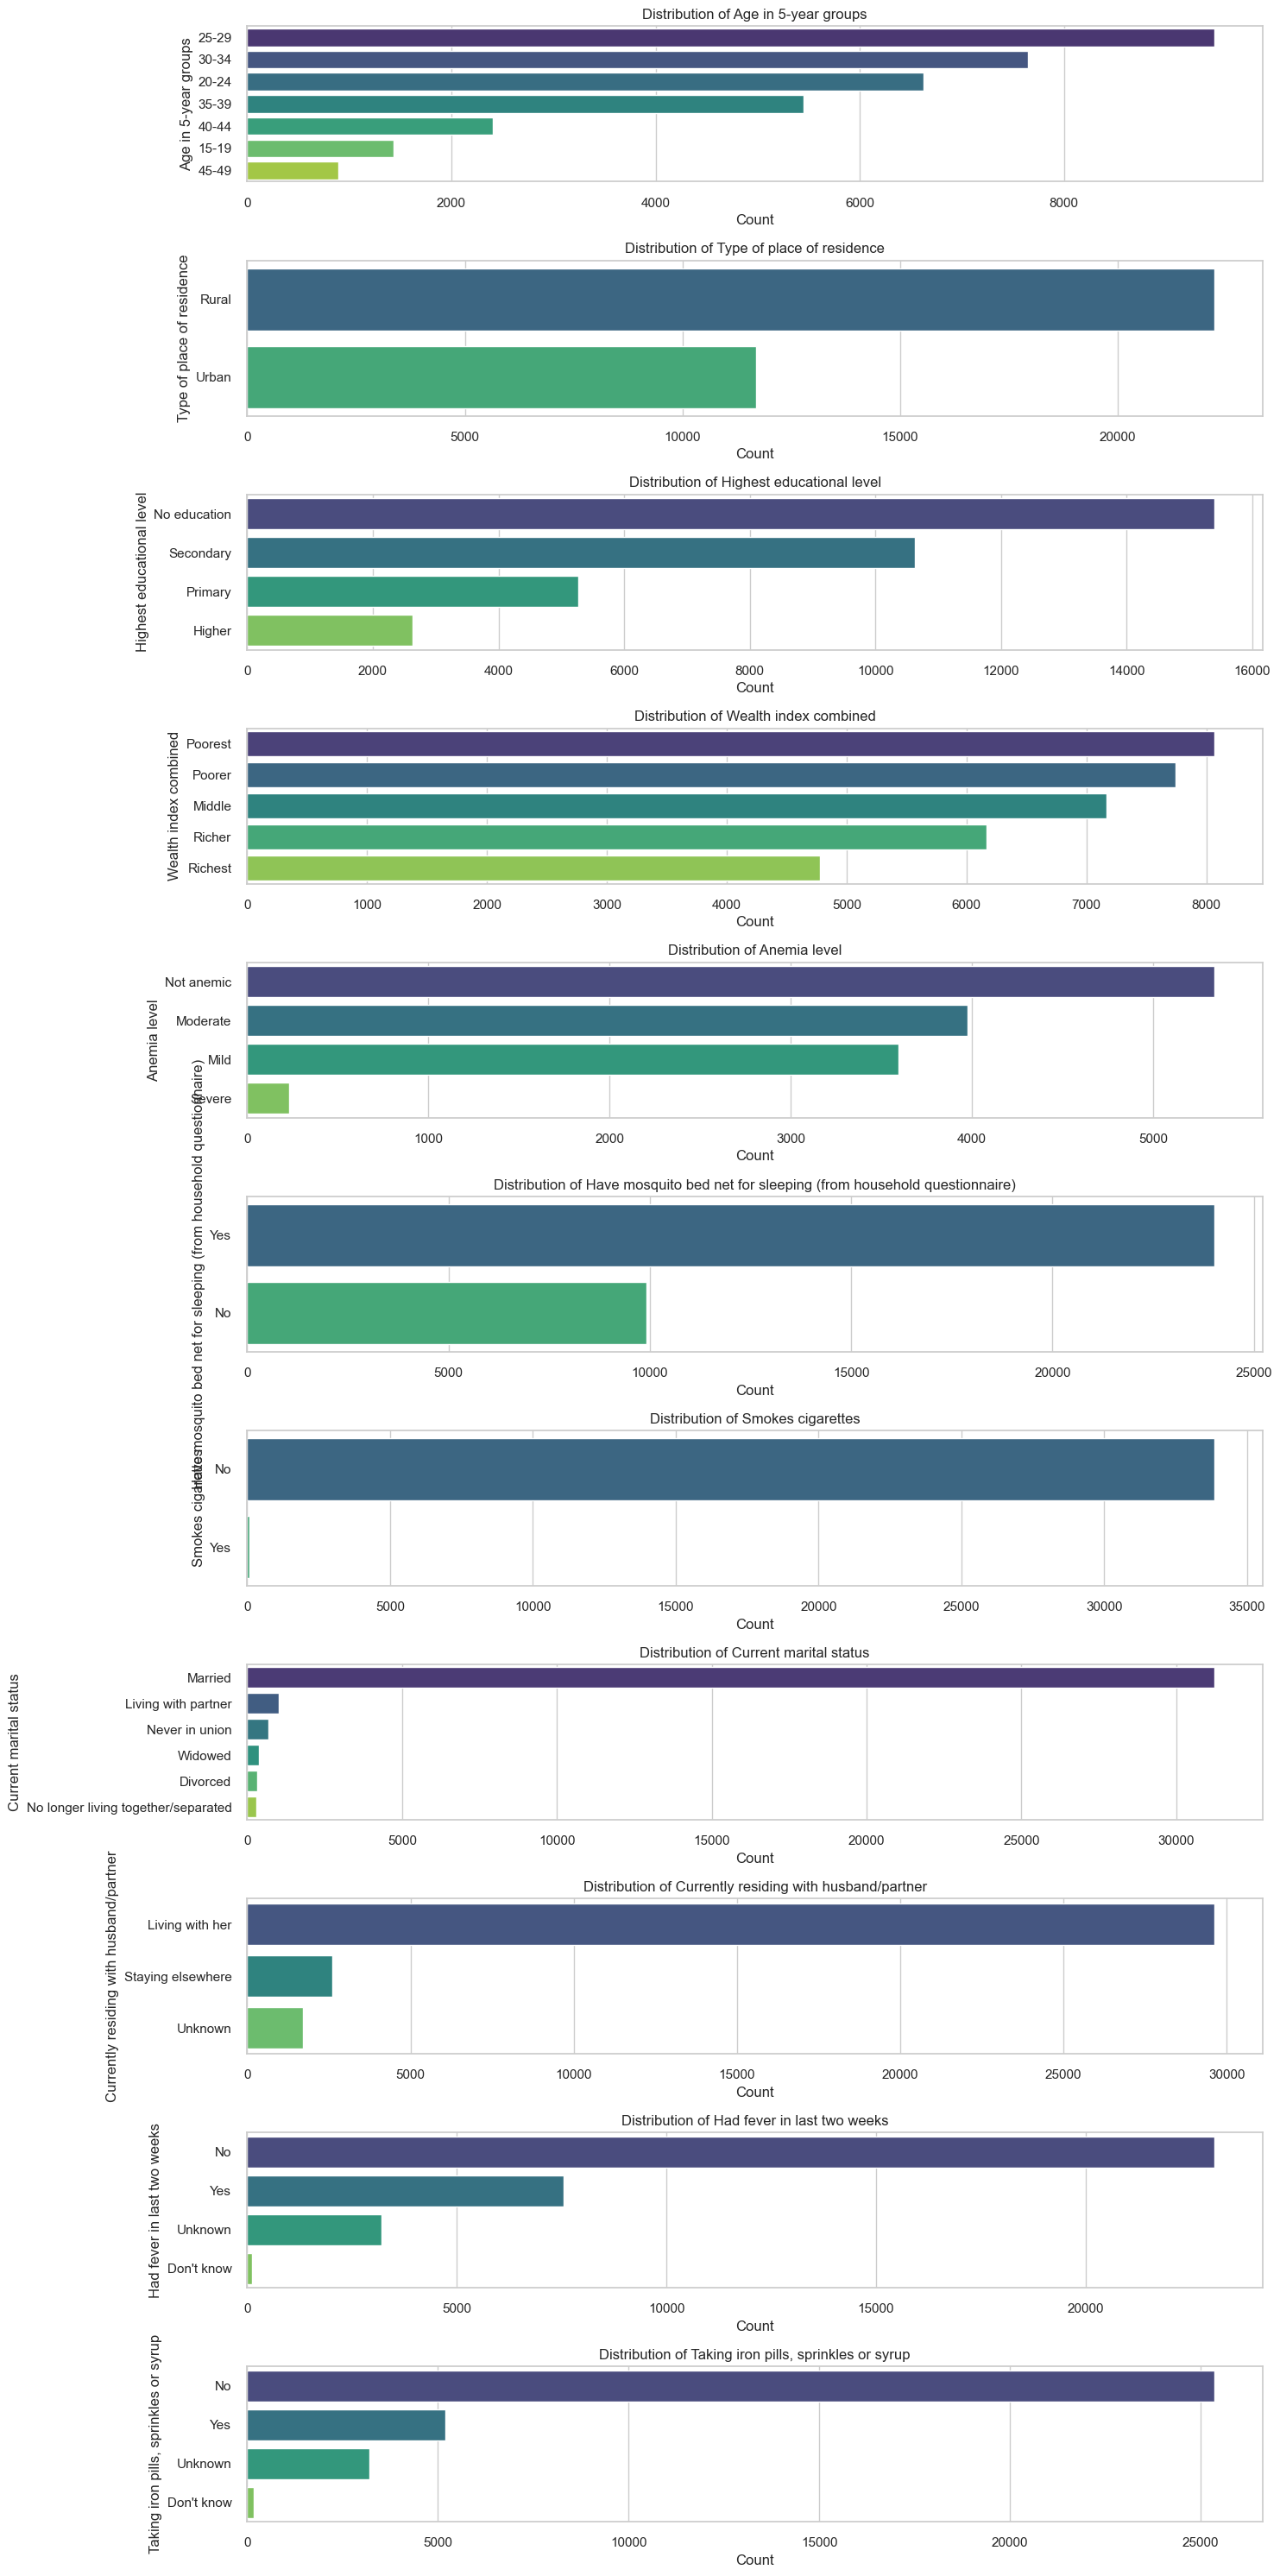

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Define the columns to visualize
categorical_columns = [
    'Age in 5-year groups', 'Type of place of residence', 'Highest educational level',
    'Wealth index combined', 'Anemia level', 'Have mosquito bed net for sleeping (from household questionnaire)',
    'Smokes cigarettes', 'Current marital status', 'Currently residing with husband/partner',
    'Had fever in last two weeks', 'Taking iron pills, sprinkles or syrup'
]

# Set the figure size
plt.figure(figsize=(15, 30))

# Iterate through each categorical column to create a subplot
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(len(categorical_columns), 1, i)
    sns.countplot(data=categorical_cols, y=col, order=categorical_cols[col].value_counts().index, palette="viridis")
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


**2.1.0 Checking for missing data and cleaning the columns in the Numerical columns**

In [51]:
# Separate numerical columns (int and float types)
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

numeric_cols.sample(n=5)

,Births in last five years,Age of respondent at 1st birth,Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),Hemoglobin level adjusted for altitude (g/dl - 1 decimal)
22924,3,16,118.0,104.0
17499,1,25,102.0,107.0
30279,1,20,123.0,109.0
15825,1,24,160.0,98.0
9360,1,22,107.0,110.0


In [52]:
# Selecting numerical columns and renaming them for proper readability
numeric_cols = df.select_dtypes(include=['int64', 'float64'])
numeric_cols = numeric_cols.rename(columns={
    'Births in last five years': 'Recent_Births',
    'Age of respondent at 1st birth': 'Age_First_Birth',
    'Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)': 'Hemoglobin_Adj_Smoking_Altitude',
    'Hemoglobin level adjusted for altitude (g/dl - 1 decimal)': 'Hemoglobin_Adj_Altitude'
})

# Display the first few rows to verify the changes
numeric_cols.sample(n=5)

,Recent_Births,Age_First_Birth,Hemoglobin_Adj_Smoking_Altitude,Hemoglobin_Adj_Altitude
19854,1,15,113.0,100.0
3022,2,28,NaN,NaN
10381,2,15,NaN,NaN
7246,2,16,96.0,112.0
18600,1,20,NaN,NaN


**2.1.1 Handling the missing data in the columns**

In [53]:
#Checking for missing values
missing_values_numeric = numeric_cols.isnull().sum()
missing_values_numeric

Recent_Births                          0
Age_First_Birth                        0
Hemoglobin_Adj_Smoking_Altitude    20788
Hemoglobin_Adj_Altitude            23742
dtype: int64

*From this observation, the only column with missing values is the "Hemoglobin_Adj_Smoking_Altitude" and "Hemoglobin_Adj_Altitude"*

In [54]:
# I'll drop the column for Hemoglobin_Adj_Altitude     
numeric_cols.drop(['Hemoglobin_Adj_Altitude'], axis=1, inplace=True)

In [55]:
#Now let us recall the cleaned numerical column
numeric_cols.head()


,Recent_Births,Age_First_Birth,Hemoglobin_Adj_Smoking_Altitude
0,1,22,NaN
1,1,28,NaN
2,1,26,NaN
3,1,25,95.0
4,1,21,NaN


In [56]:
#Dropping the rowS with missingcolumns in the numeric cols
numeric_cols = numeric_cols.dropna()

numeric_cols.isnull().sum()

Recent_Births                      0
Age_First_Birth                    0
Hemoglobin_Adj_Smoking_Altitude    0
dtype: int64

**2.1.2 Descriptive Statistics**

In [57]:
# Display the cleaned numerical columns with descriptive statistics
print("Summary of cleaned numerical columns:")
numeric_cols.describe()

Summary of cleaned numerical columns:


,Recent_Births,Age_First_Birth,Hemoglobin_Adj_Smoking_Altitude
count,13136.000000,13136.000000,13136.000000
mean,1.830238,19.858100,114.367235
std,0.710968,4.420783,15.915408
min,1.000000,12.000000,20.000000
25%,1.000000,17.000000,105.000000
50%,2.000000,19.000000,115.000000
75%,2.000000,22.000000,125.000000
max,6.000000,45.000000,218.000000



###### Interpretation

1. **Recent Births (Births in last five years)**:


- Mean: ~1.82 births

- Most mothers had between 1-2 children in the last five years

- Range: The data shows mothers having between 1 and several children


2. **Age at First Birth**:

- Mean: ~19.57 years

- This indicates that on average, mothers had their first child around 19-20 years old


- The data suggests early childbearing is common in the population


3. **Hemoglobin Levels (both adjusted for smoking/altitude and altitude only)**:


- The mean hemoglobin levels appear to be around 101-114 g/dL

- There's considerable variation in hemoglobin levels:

  - Minimum: 29 g/dL (severely anemic)
  
  - Maximum: 170 g/dL
  
  - Standard deviation indicates significant spread in the values

##### Key observation
  
1. The early average age of first birth (19.57 years) might be a factor affecting maternal and child health outcomes


2. The wide range in hemoglobin levels (29-170 g/dL) suggests varying degrees of anemia in the population

3. The relatively small average number of recent births (1.82) might indicate some level of family planning awareness


**2.1.3 Visualization**

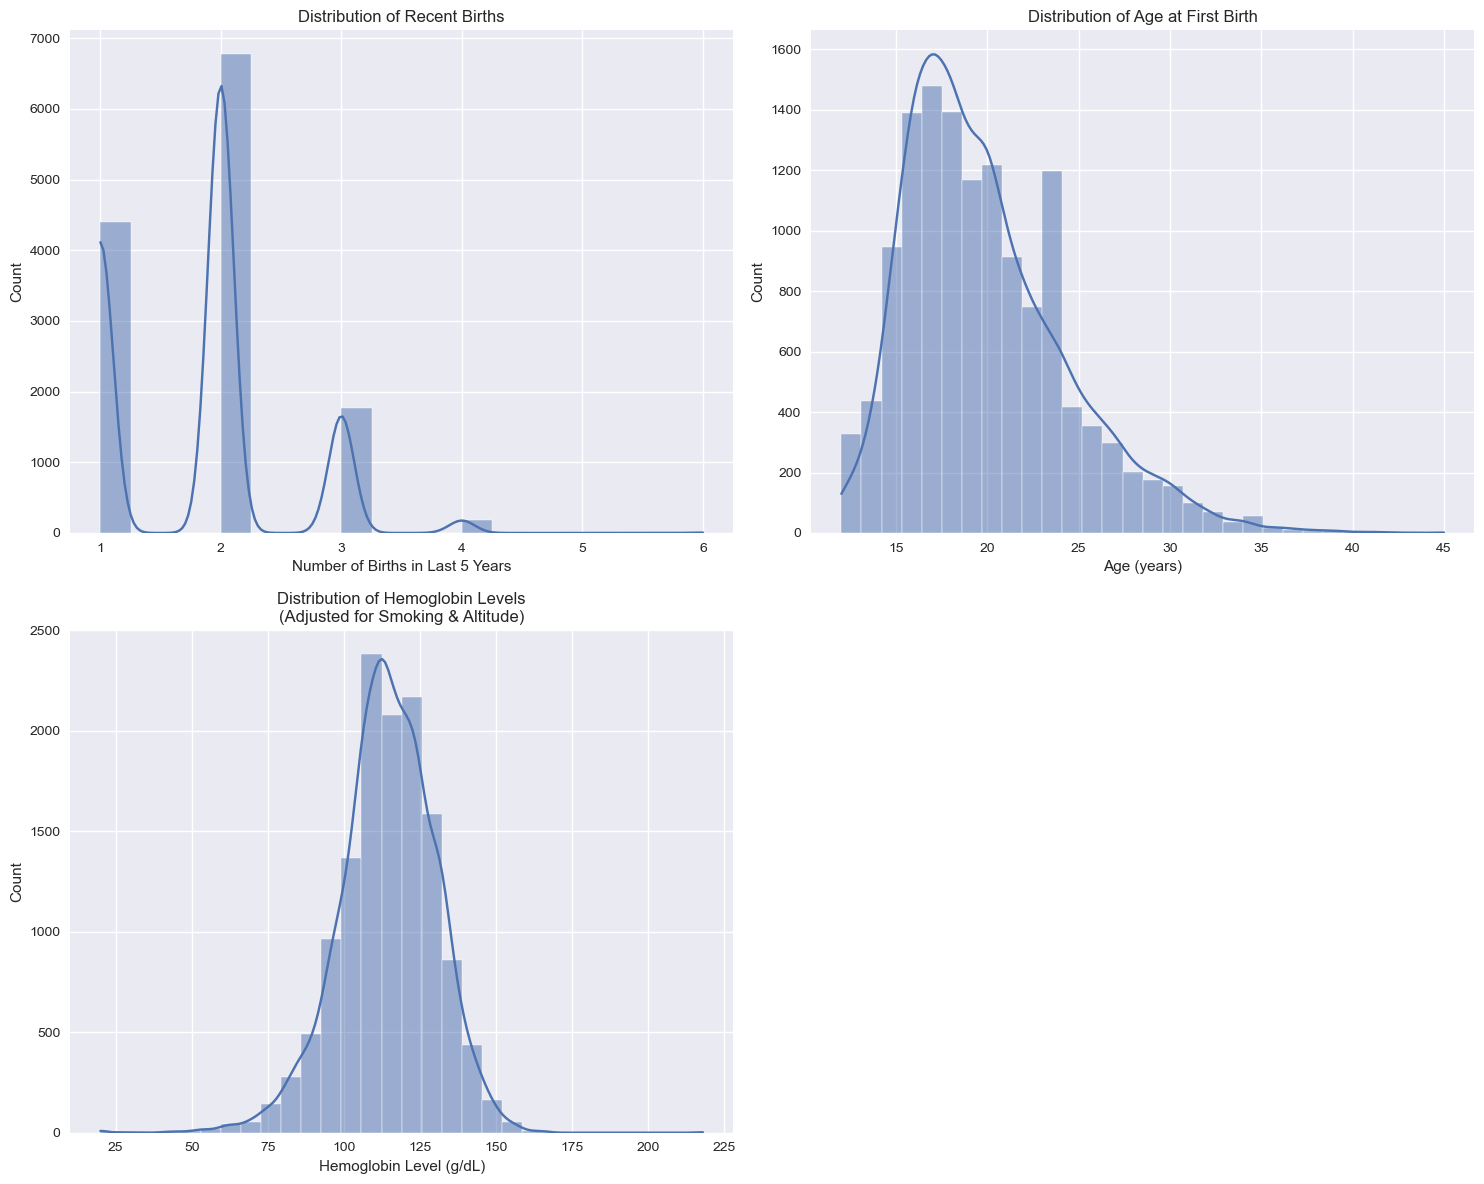

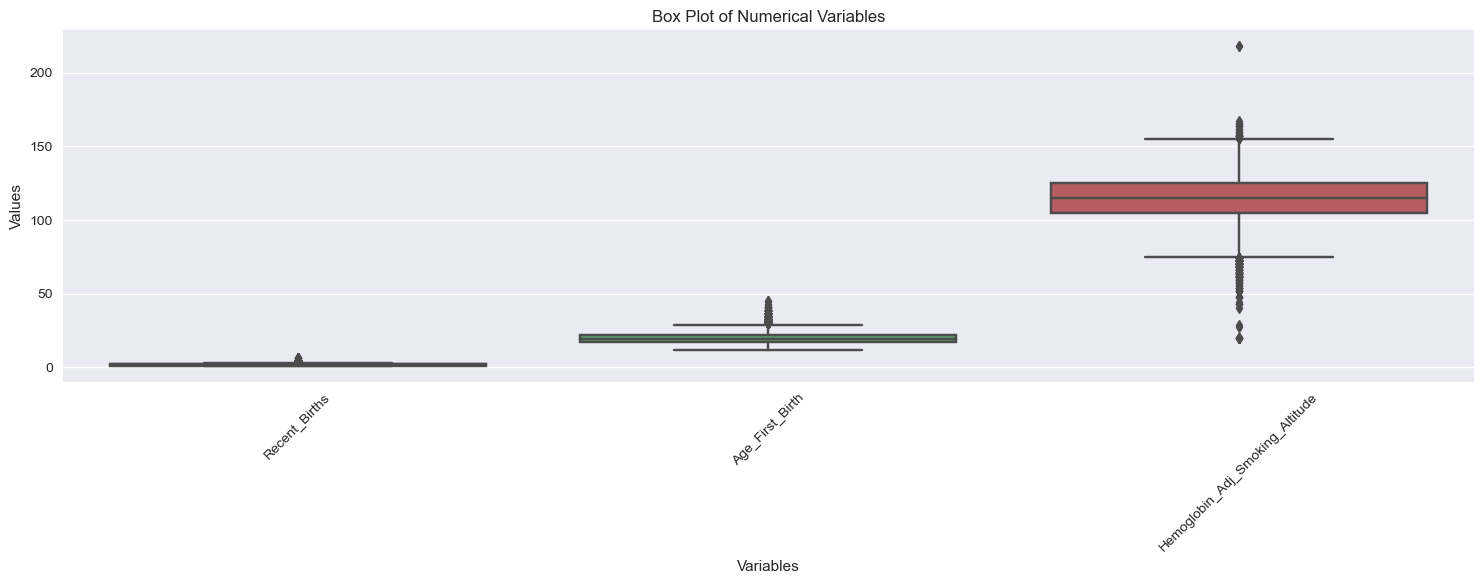

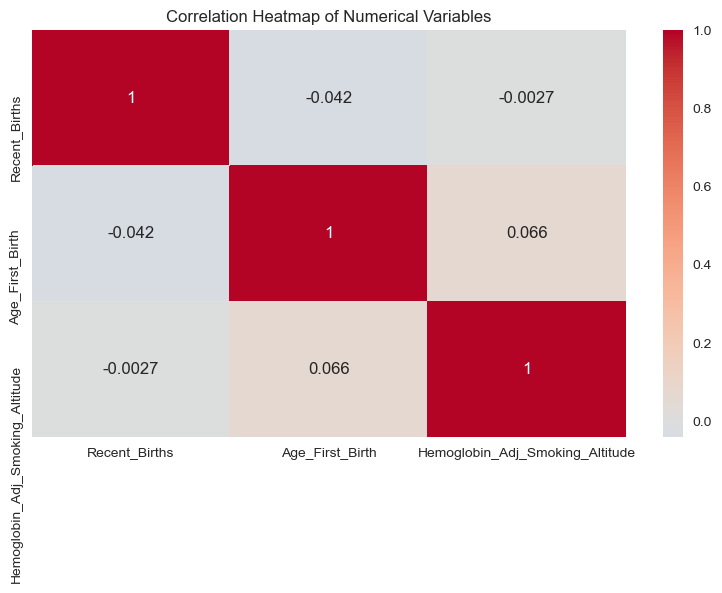

In [58]:

# Set the style and figure size
plt.style.use('seaborn')
fig = plt.figure(figsize=(15, 12))

# Create subplots for each numerical column
# 1. Recent Births
plt.subplot(2, 2, 1)
sns.histplot(data=numeric_cols, x='Recent_Births', bins=20, kde=True)
plt.title('Distribution of Recent Births')
plt.xlabel('Number of Births in Last 5 Years')
plt.ylabel('Count')

# 2. Age at First Birth
plt.subplot(2, 2, 2)
sns.histplot(data=numeric_cols, x='Age_First_Birth', bins=30, kde=True)
plt.title('Distribution of Age at First Birth')
plt.xlabel('Age (years)')
plt.ylabel('Count')

# 3. Hemoglobin (Smoking & Altitude Adjusted)
plt.subplot(2, 2, 3)
sns.histplot(data=numeric_cols, x='Hemoglobin_Adj_Smoking_Altitude', bins=30, kde=True)
plt.title('Distribution of Hemoglobin Levels\n(Adjusted for Smoking & Altitude)')
plt.xlabel('Hemoglobin Level (g/dL)')
plt.ylabel('Count')

# Adjust layout and display
plt.tight_layout()
plt.show()

# Create a box plot for all numerical columns
plt.figure(figsize=(15, 6))
numeric_cols_melted = numeric_cols.melt()
sns.boxplot(data=numeric_cols_melted, x='variable', y='value')
plt.xticks(rotation=45)
plt.title('Box Plot of Numerical Variables')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.tight_layout()
plt.show()

# Create a smaller correlation heatmap
plt.figure(figsize=(8, 6))  # Adjusted figsize to make the plot smaller
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Variables')
plt.tight_layout()
plt.show()


1. **Distribution Plots**:

a) **Recent Births Distribution**:
- Shows a right-skewed distribution
- Most mothers have 1-2 births in the last five years
- The frequency decreases as the number of births increases
- Very few cases of 4 or more births

b) **Age at First Birth Distribution**:
- Roughly normal distribution with a slight right skew
- Peak around 18-20 years
- Most first births occur between 15-25 years
- Some outliers showing first births at older ages

c) **Hemoglobin Levels (Smoking & Altitude Adjusted)**:
- Shows a bimodal distribution
- Main concentration around 100-120 g/dL
- Secondary peak likely due to the imputed values
- Some extreme values at both ends

2. **Box Plot**:

Shows the distribution of all numerical variables in one view:
- **Recent Births**: 
  - Median around 2 births
  - Several outliers above
  - Compact box indicating consistent patterns

- **Age at First Birth**:
  - Median around 19-20 years
  - Several outliers at higher ages
  - Relatively symmetric distribution

- **Both Hemoglobin Measurements**:
  - Similar distributions
  - Several outliers at both extremes
  - Wider boxes indicating more variability

3. **Correlation Heatmap**:

Shows the relationships between variables:
- Strong positive correlation (≈1.0) between the two hemoglobin measurements
- Weak negative correlation between Age at First Birth and Recent Births
- Very weak correlations between hemoglobin levels and other variables

Key Insights:
1. Early childbearing is common in the population
2. Family size tends to be moderate (1-2 children in 5 years)
3. Hemoglobin levels show significant variation, suggesting varying degrees of anemia
4. The two hemoglobin measurements are highly correlated, as expected
5. Age at first birth and number of recent births have minimal impact on hemoglobin levels



# Combined cleaned dataframe for te numerical and categorical columns


In [59]:
# Combine categorical and numerical columns
combined_df = pd.concat([categorical_cols, numeric_cols], axis=1)
combined_df.head()

,Age in 5-year groups,Type of place of residence,Highest educational level,Wealth index combined,Anemia level,Have mosquito bed net for sleeping (from household questionnaire),Smokes cigarettes,Current marital status,Currently residing with husband/partner,Had fever in last two weeks,"Taking iron pills, sprinkles or syrup",Recent_Births,Age_First_Birth,Hemoglobin_Adj_Smoking_Altitude
0,40-44,Urban,Higher,Richest,NaN,Yes,No,Living with partner,Staying elsewhere,No,Yes,NaN,NaN,NaN
1,35-39,Urban,Higher,Richest,NaN,Yes,No,Married,Living with her,No,No,NaN,NaN,NaN
2,25-29,Urban,Higher,Richest,NaN,No,No,Married,Living with her,No,No,NaN,NaN,NaN
3,25-29,Urban,Secondary,Richest,Moderate,Yes,No,Married,Living with her,No,No,1.0,25.0,95.0
4,20-24,Urban,Secondary,Richest,NaN,Yes,No,No longer living together/separated,Unknown,No,No,NaN,NaN,NaN


## Distributions

**1. Distribution of anemia levels**

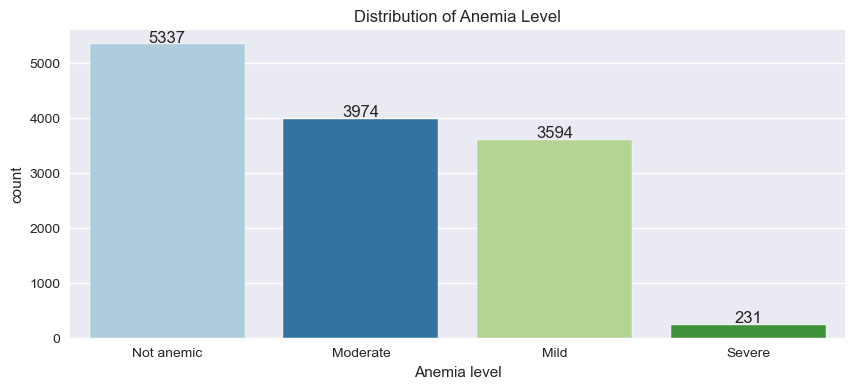

In [60]:

order = combined_df['Anemia level'].value_counts().index.tolist()
    
# Plot the distribution of 'Anemia level'
plt.figure(figsize=(10, 4))
ax = sns.countplot(data=combined_df, x='Anemia level', order=order, palette='Paired')
# Add labels to each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

    plt.title("Distribution of Anemia Level")
 




**Hemoglobin_Adj_Smoking_Altitude and Age_First_Birth**

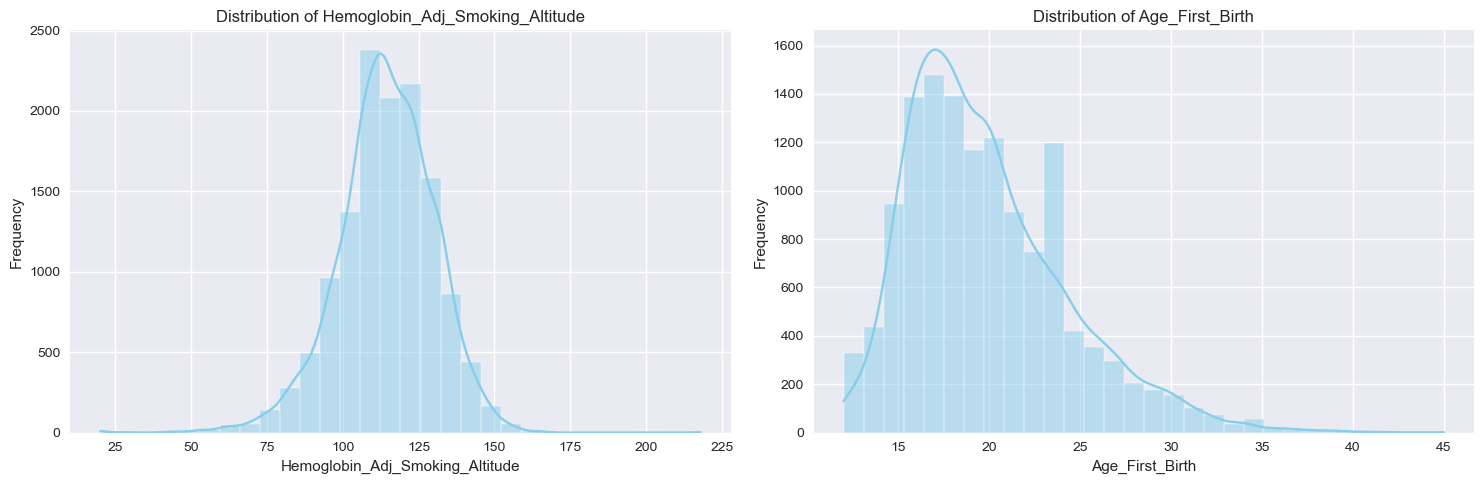

In [61]:
# List of numerical columns to plot
numerical_columns = ['Hemoglobin_Adj_Smoking_Altitude', 'Age_First_Birth']

# Set up the matplotlib figure with a larger figure size for clarity
plt.figure(figsize=(15, 5))

# Loop through each numerical column and plot a histogram with KDE
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), i)  # Arrange plots side by side
    sns.histplot(combined_df[col], kde=True, color="skyblue", bins=30)  # Histogram with KDE overlay
    
    # Set titles and labels
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout to prevent overlapping of subplots
plt.tight_layout()
plt.show()

**Distribution between anemia level and age group**

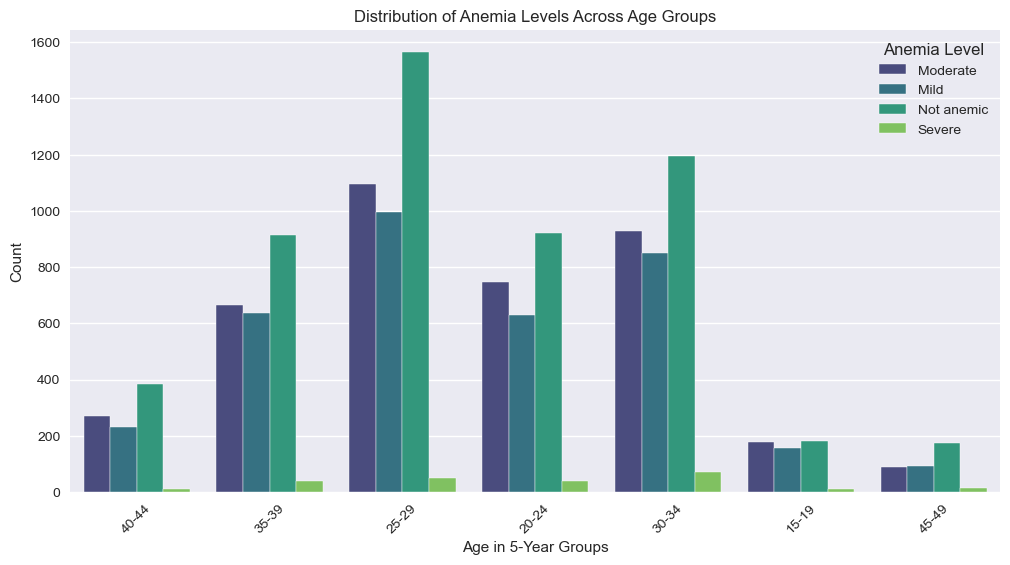

In [62]:
# Set up the plot size
plt.figure(figsize=(12, 6))

# Plot count plot for Anemia level across Age groups
sns.countplot(data=combined_df, x='Age in 5-year groups', hue='Anemia level', palette="viridis")

# Set title and labels
plt.title("Distribution of Anemia Levels Across Age Groups")
plt.xlabel("Age in 5-Year Groups")
plt.ylabel("Count")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.legend(title='Anemia Level')
plt.show()

**Distribution between anemia and wealth**

<Figure size 1200x600 with 0 Axes>

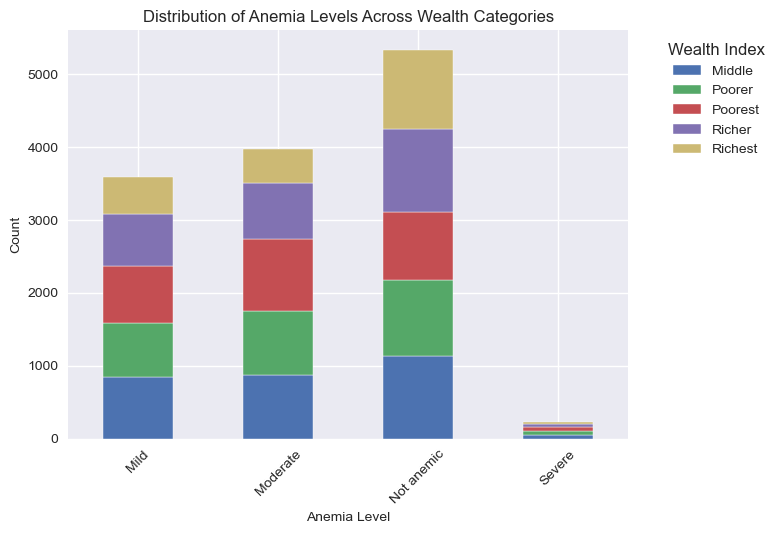


Percentage Distribution:
Wealth index combined  Middle  Poorer  Poorest  Richer  Richest
Anemia level                                                   
Mild                    28.99   27.44    28.39   26.84    24.29
Moderate                30.16   32.52    35.66   28.74    22.17
Not anemic              39.20   38.12    33.89   42.63    52.29
Severe                   1.66    1.92     2.06    1.79     1.25


In [63]:
# Distribution between anemia level and wealth index
plt.figure(figsize=(12, 6))

# Create a cross-tabulation
anemia_wealth_dist = pd.crosstab(combined_df['Anemia level'], 
                                combined_df['Wealth index combined'])

# Create a stacked bar plot
anemia_wealth_dist.plot(kind='bar', stacked=True)

# Customize the plot
plt.title('Distribution of Anemia Levels Across Wealth Categories', fontsize=12)
plt.xlabel('Anemia Level', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.legend(title='Wealth Index', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

# Print percentage distribution
print("\nPercentage Distribution:")
percentage_dist = pd.crosstab(combined_df['Anemia level'], 
                            combined_df['Wealth index combined'], 
                            normalize='columns') * 100
print(percentage_dist.round(2))

# 3.0 PREPROCESSING

**3.1 One Hot Encoding for Categorical columns**

In [64]:
categorical_cols.head()

,Age in 5-year groups,Type of place of residence,Highest educational level,Wealth index combined,Anemia level,Have mosquito bed net for sleeping (from household questionnaire),Smokes cigarettes,Current marital status,Currently residing with husband/partner,Had fever in last two weeks,"Taking iron pills, sprinkles or syrup"
0,40-44,Urban,Higher,Richest,NaN,Yes,No,Living with partner,Staying elsewhere,No,Yes
1,35-39,Urban,Higher,Richest,NaN,Yes,No,Married,Living with her,No,No
2,25-29,Urban,Higher,Richest,NaN,No,No,Married,Living with her,No,No
3,25-29,Urban,Secondary,Richest,Moderate,Yes,No,Married,Living with her,No,No
4,20-24,Urban,Secondary,Richest,NaN,Yes,No,No longer living together/separated,Unknown,No,No


In [65]:
from sklearn.preprocessing import LabelEncoder

# Make a copy of the categorical columns DataFrame to avoid modifying the original data
encoded_categorical_cols = categorical_cols.copy()

# Apply LabelEncoder to each column individually and also convert them to integers.
for col in encoded_categorical_cols.columns:
    encoder = LabelEncoder()
    encoded_categorical_cols[col] = encoder.fit_transform(encoded_categorical_cols[col].astype(str)).astype(int)

# Display the encoded categorical data to verify they are integers
encoded_categorical_cols.head()



,Age in 5-year groups,Type of place of residence,Highest educational level,Wealth index combined,Anemia level,Have mosquito bed net for sleeping (from household questionnaire),Smokes cigarettes,Current marital status,Currently residing with husband/partner,Had fever in last two weeks,"Taking iron pills, sprinkles or syrup"
0,5,1,0,4,4,1,0,1,1,1,3
1,4,1,0,4,4,1,0,2,0,1,1
2,2,1,0,4,4,0,0,2,0,1,1
3,2,1,3,4,1,1,0,2,0,1,1
4,1,1,3,4,4,1,0,4,2,1,1


**3.2 Rejoing the categorical columns with numerical columns and also reset the index.**

In [71]:
#Reset the index
numeric_cols.reset_index(drop=True, inplace=True)
encoded_categorical_cols.reset_index(drop=True, inplace=True)

#Now combine them to a new data frame
final_df = pd.concat([numeric_cols, encoded_categorical_cols], axis=1)

final_df.head()

,Recent_Births,Age_First_Birth,Hemoglobin_Adj_Smoking_Altitude,Age in 5-year groups,Type of place of residence,Highest educational level,Wealth index combined,Anemia level,Have mosquito bed net for sleeping (from household questionnaire),Smokes cigarettes,Current marital status,Currently residing with husband/partner,Had fever in last two weeks,"Taking iron pills, sprinkles or syrup"
0,1.0,25.0,95.0,5,1,0,4,4,1,0,1,1,1,3
1,1.0,30.0,113.0,4,1,0,4,4,1,0,2,0,1,1
2,2.0,32.0,121.0,2,1,0,4,4,0,0,2,0,1,1
3,2.0,32.0,121.0,2,1,3,4,1,1,0,2,0,1,1
4,1.0,19.0,108.0,1,1,3,4,4,1,0,4,2,1,1


In [74]:
# Check for missing values
print(final_df.isnull().sum())


Recent_Births                                                        20788
Age_First_Birth                                                      20788
Hemoglobin_Adj_Smoking_Altitude                                      20788
Age in 5-year groups                                                     0
Type of place of residence                                               0
Highest educational level                                                0
Wealth index combined                                                    0
Anemia level                                                             0
Have mosquito bed net for sleeping (from household questionnaire)        0
Smokes cigarettes                                                        0
Current marital status                                                   0
Currently residing with husband/partner                                  0
Had fever in last two weeks                                              0
Taking iron pills, sprink

In [75]:
#droping the columns with missing values
final_df.dropna(inplace=True)
final_df.isnull().sum()


Recent_Births                                                        0
Age_First_Birth                                                      0
Hemoglobin_Adj_Smoking_Altitude                                      0
Age in 5-year groups                                                 0
Type of place of residence                                           0
Highest educational level                                            0
Wealth index combined                                                0
Anemia level                                                         0
Have mosquito bed net for sleeping (from household questionnaire)    0
Smokes cigarettes                                                    0
Current marital status                                               0
Currently residing with husband/partner                              0
Had fever in last two weeks                                          0
Taking iron pills, sprinkles or syrup                                0
dtype:

In [77]:
# Get total number of columns
print(f"Total number of columns: {final_df.shape[1]}")

Total number of columns: 14


# 4.0 MODELING

**5.1 Feature Selection**

In [78]:
#perform a correlation of the anemia level with the other features.
corr_matrix = final_df.corr()
corr_matrix['Anemia level'].sort_values(ascending=False)

Anemia level                                                         1.000000
Wealth index combined                                                0.002175
Age_First_Birth                                                      0.001730
Hemoglobin_Adj_Smoking_Altitude                                     -0.003328
Current marital status                                              -0.004617
Recent_Births                                                       -0.006256
Highest educational level                                           -0.007215
Smokes cigarettes                                                   -0.008607
Type of place of residence                                          -0.012726
Age in 5-year groups                                                -0.012837
Taking iron pills, sprinkles or syrup                               -0.023055
Had fever in last two weeks                                         -0.023764
Currently residing with husband/partner                         

**Hemoglobin (Adjusted for Smoking & Altitude):** This feature has the strongest positive correlation with anemia level (
𝑟=0.332, r=0.332), suggesting that adjusted hemoglobin levels may be an indicator of anemia status.

In [79]:
#Select the top 10 features with the highest correlation values
top_10_features = corr_matrix['Anemia level'].nlargest(10)
top_10_features

Anemia level                       1.000000
Wealth index combined              0.002175
Age_First_Birth                    0.001730
Hemoglobin_Adj_Smoking_Altitude   -0.003328
Current marital status            -0.004617
Recent_Births                     -0.006256
Highest educational level         -0.007215
Smokes cigarettes                 -0.008607
Type of place of residence        -0.012726
Age in 5-year groups              -0.012837
Name: Anemia level, dtype: float64

**5.2 Splitting the data**

In [80]:
#spliting the data for training and test size
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = final_df.drop('Anemia level', axis=1)
y = final_df['Anemia level']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#checking the shapes of the training and test data
print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)


Training data shape: (10508, 13) (10508,)
Testing data shape: (2628, 13) (2628,)


**5.3 Handling class Imbalance**

In [81]:
# Import necessary libraries
from imblearn.over_sampling import SMOTE
from collections import Counter

# Check the class distribution before SMOTE
print("Class distribution before SMOTE:", Counter(y_train))

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Apply SMOTE only on training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the class distribution after SMOTE
print("Class distribution after SMOTE:")
print(Counter(y_train_resampled))

Class distribution before SMOTE: Counter({4: 6748, 2: 1508, 1: 1131, 0: 1068, 3: 53})
Class distribution after SMOTE:
Counter({2: 6748, 4: 6748, 0: 6748, 1: 6748, 3: 6748})


**5.4 Visualization of the SMOTE distribution**

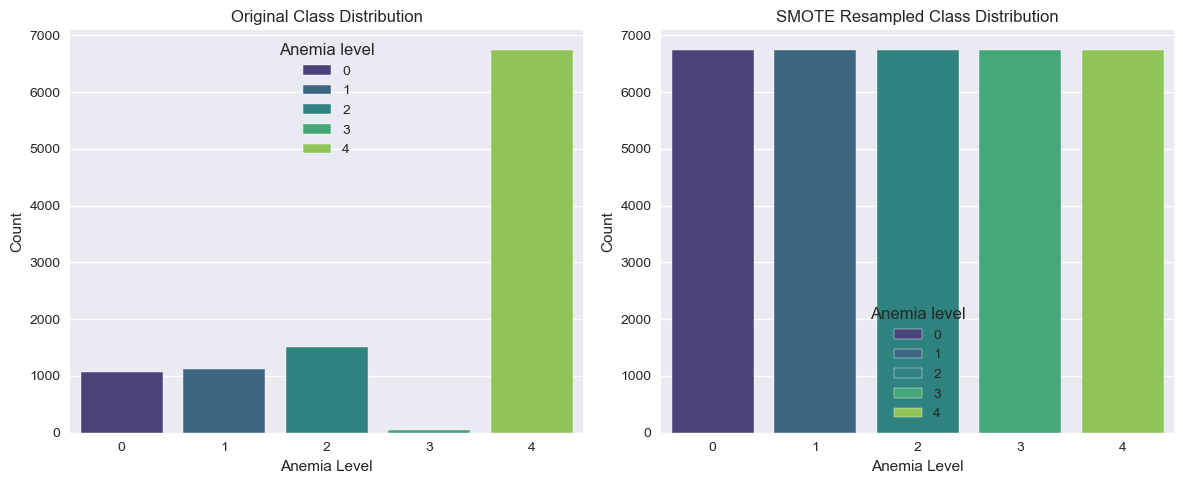

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_class_distribution(y_train, y_resampled):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    
    sns.countplot(x=y_train, ax=ax[0], palette='viridis', hue=y_train, dodge=False)
    ax[0].set_title('Original Class Distribution')
    ax[0].set_xlabel('Anemia Level')
    ax[0].set_ylabel('Count')
    
    sns.countplot(x=y_resampled, ax=ax[1], palette='viridis', hue=y_resampled, dodge=False)
    ax[1].set_title('SMOTE Resampled Class Distribution')
    ax[1].set_xlabel('Anemia Level')
    ax[1].set_ylabel('Count')
    
    plt.tight_layout()
    plt.show()

plot_class_distribution(y_train, y_resampled)


**Standard Scalling**

Standard Scaler is a preprocessing technique used to normalize the range of independent features in a dataset. It transforms the data to have a mean of 0 and a standard deviation of 1 and ensures that all features contribute equally to the model, preventing features with larger ranges from dominating the learning process.

After handling class imbalance with `SMOTE`we will fit the scaler on the resampled training data and then transform it.

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter


scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)  # Fit and transform on training data
X_test_scaled = scaler.transform(X_test)  # Only transform on test data



**Fitting Logistic regression model**


Accuracy: 0.31
Classification Report:
              precision    recall  f1-score   support

           0       0.08      0.12      0.10       262
           1       0.11      0.10      0.11       258
           2       0.22      0.12      0.15       434
           3       0.01      0.23      0.01        13
           4       0.59      0.42      0.49      1661

    accuracy                           0.31      2628
   macro avg       0.20      0.20      0.17      2628
weighted avg       0.43      0.31      0.36      2628



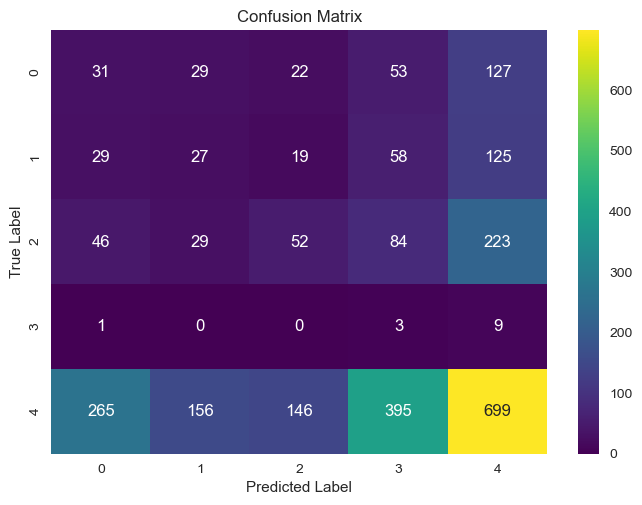

In [88]:
# Step 3: Train the Logistic Regression Model
logreg = LogisticRegression(max_iter=200, random_state=42)
logreg.fit(X_train_resampled_scaled, y_train_resampled)

# Step 4: Make Predictions and Evaluate
y_pred = logreg.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', xticklabels=logreg.classes_, yticklabels=logreg.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

- Class Imbalance: SMOTE has effectively balanced the training data, which helps improve the model’s ability to capture minority classes.

- Performance Variations: The model performs best on class 2, followed by class 1. Classes 0, 3, and 4 have slightly lower precision and recall, indicating more room for improvement.


- Common Misclassifications: Class 4 is frequently confused with classes 0, 1, and 2, suggesting a need for further refinement, potentially through more feature engineering or a more complex model.

- Overall, the model performs well, with an accuracy of 88% and strong metrics for most classes, though class 4 requires additional attention to improve specificity and reduce misclassifications.